## Import Packages

In [1]:
import uproot
import pyjet
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import sys, os
import importlib
import time

from BranchClass import *

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm


from itertools import combinations

## Import File

In [2]:

process_path_herwig_angular = "./Data_root/ppwz_angular.root"
#process_path_MEZJet = "/home/MC_Samples/Universality_DNN/Herwig_test_/LHC.root"
process_path_pythia_default = "./Data_root/ppwz_pythia_default.root"
# process_path_pythia_2 = "/home/MC_Samples/Universality_DNN/Pythia/ppww_2.root"
process_path_pythia_vincia = "./Data_root/ppwz_pythia_vincia.root"
process_path_pythia_dipole = "./Data_root/ppwz_pythia_dipole.root"
process_path_sherpa = "./Data_root/ppwz_sherpa.root"

process_path_herwig_angular_QCD = "./Data_root/ppjj_angular.root"
process_path_pythia_default_QCD = "./Data_root/ppjj_pythia_default.root"
process_path_pythia_vincia_QCD = "./Data_root/ppjj_pythia_vincia.root"
process_path_pythia_dipole_QCD = "./Data_root/ppjj_pythia_dipole.root"
process_path_sherpa_QCD = "./Data_root/ppjj_sherpa.root"




try:
    herwig_angular = uproot.open(process_path_herwig_angular)["Delphes;1"]
    #MEZJet = uproot.open(process_path_MEZJet)["Delphes;1"]
    pythia_default = uproot.open(process_path_pythia_default)["Delphes;1"]
#     pythia_2 = uproot.open(process_path_pythia_2)["Delphes;1"]
    pythia_vincia = uproot.open(process_path_pythia_vincia)["Delphes;1"]
    pythia_dipole = uproot.open(process_path_pythia_dipole)["Delphes;1"]
    sherpa = uproot.open(process_path_sherpa)["Delphes;1"]
    
    herwig_angular_QCD = uproot.open(process_path_herwig_angular_QCD)["Delphes;1"]
    pythia_default_QCD = uproot.open(process_path_pythia_default_QCD)["Delphes;1"]
    pythia_vincia_QCD = uproot.open(process_path_pythia_vincia_QCD)["Delphes;1"]
    pythia_dipole_QCD = uproot.open(process_path_pythia_dipole_QCD)["Delphes;1"]
    sherpa_QCD = uproot.open(process_path_sherpa_QCD)["Delphes;1"]
    
    
#     process_list = [ppwz, pythia_1, pythia_2]
    
    print("All Files are loaded!")
    
except:
    print("Please Check Input Files")


All Files are loaded!


In [68]:
pppppp = "./Data_root/ppwz_sherpa_def_10.root"
# pppppp = "../Universality/Data_root/ppwz_sherpa_def_10.root"
pppppp = str(pppppp)

findlast = []
import re
for i in re.finditer("/",pppppp):
    findlast.append(i.start())

l = findlast[-1]    

print(pppppp[l+13:l+16])
print(pppppp[l+6:l+12])
print(pppppp[l+1:l+5])

def
sherpa
ppwz


In [61]:
pppppp.find("ppwz")

12

1
11


In [60]:
re.finditer("/",pppppp)

In [3]:
def Event_List(GenParticle):
    print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
    ticks_1 = time.time()
    
    k = 0
    event_list = []
    
    for N in range(GenParticle.length):
        
        event_list_tmp = []
        event_list_tmp_tmp = []


        event_list_tmp.append([GenParticle.PT_At(N),  GenParticle.Eta_At(N), \
                               GenParticle.Phi_At(N), GenParticle.Mass_At(N), \
                               GenParticle.PID_At(N), GenParticle.Status_At(N)
                              ])

        event_list_tmp = np.array(event_list_tmp)
        event_list_tmp = event_list_tmp[0][:,event_list_tmp[0][5,:]==1]
        event_list_tmp = event_list_tmp[:,np.abs(event_list_tmp[4,:])!=12]
        event_list_tmp = event_list_tmp[:,np.abs(event_list_tmp[4,:])!=14]
        event_list_tmp = event_list_tmp[:,np.abs(event_list_tmp[4,:])!=16]
        
        event_list.append(event_list_tmp)

    ticks_2 = time.time()
    totaltime =  ticks_2 - ticks_1
    print("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))
    
    return event_list

In [4]:
GenParticle_herwig_angular = BrachGenParticles(herwig_angular)

In [5]:
Event_List_herwig_angular = Event_List(GenParticle_herwig_angular)

Wed Oct 28 16:23:22 2020
Time Cost : 0.2145 min


In [6]:
# event_list = [Event_List_herwig_angular,Event_List_pythia_default,Event_List_pythia_vincia,Event_List_pythia_dipole,Event_List_sherpa,
#               Event_List_herwig_angular_QCD,Event_List_pythia_default_QCD,Event_List_pythia_vincia_QCD,Event_List_pythia_dipole_QCD,Event_List_sherpa_QCD]
# event_list_clustered = [[],[],[],[],[],[],[],[],[],[]]


event_list = [Event_List_herwig_angular]
event_list_clustered = [[]]

# event_list = [Event_List_herwig_angular_QCD,Event_List_sherpa_QCD]
# event_list_clustered = [[],[]]
for i, element in enumerate(event_list):
    print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
    ticks_1 = time.time()
    for j in range(len(element)):
        
#         print(len(element[j]))
        to_cluster = np.core.records.fromarrays(element[j], 
                                                 names="pT, eta, phi, mass, PID, Status",
                                                 formats = "f8, f8, f8, f8, f8, f8")
        pt_min = 300
        sequence_cluster = pyjet.cluster(to_cluster, R = 1.2, p = -1) # p = -1: anti-kt , 0: Cambridge-Aachen(C/A), 1: kt
        jets_cluster = sequence_cluster.inclusive_jets(pt_min)
        event_list_clustered[i].append(jets_cluster)
#         print("j",j)
#         if j == 5000:
#             break
    
    ticks_2 = time.time()
    totaltime =  ticks_2 - ticks_1
    print("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))

Wed Oct 28 16:23:35 2020
Time Cost : 6.7489 min


In [94]:
len(Event_List_herwig_angular)

100000

In [49]:
def jet_trim(jet0, pt_cut= 0.03, R1 = 0.2):
    # Define a cut threshold that the subjets have to meet (i.e. 5% of the original jet pT)
    jet0_max = jet0.pt
    jet0_cut = jet0_max*pt_cut

    # Grab the subjets by clustering with R1
    subjets = pyjet.cluster(jet0.constituents_array(), R=R1, p=1) # p = -1: anti-kt , 0: Cambridge-Aachen(C/A), 1: kt
    subjet_array = subjets.inclusive_jets()
    j0 = []
    if (subjet_array[0].pt >= jet0_cut):
        for ij, subjet in enumerate(subjet_array):
            if subjet.pt < jet0_cut:
                # subjet doesn't meet the percentage cut on the original jet pT
                continue
            if subjet.pt >= jet0_cut:
                # Get the subjets pt, eta, phi constituents
                subjet_data = subjet.constituents_array()
                j0.append(subjet_data)
    else:
        j0 = subjet_array[0].constituents_array()*0
    jet = j0[0]
    for i, subjet in enumerate(j0):
        if i==0 :
            continue
        jet = np.append(jet, subjet)
        
    sequence = pyjet.cluster(jet, R=1.0, p=-1)
    jet = sequence.inclusive_jets()
    return jet

####################################
def CalcDeltaR(j1, j2):
    eta1 = j1.eta
    phi1 = j1.phi
    eta2 = j2.eta
    phi2 = j2.phi

    dEta = eta1-eta2
    dPhi = abs(phi1-phi2)
    if dPhi > np.pi:
        dPhi = 2*np.pi - dPhi

    dR = (dPhi**2 + dEta**2)**0.5

    return dR

def CalcEECorr(jet, n=1, beta=1.0):

    assert n == 2 or n == 3, 'fn must be in [2, 3] but is n'

    jet_particles = jet.constituents()

    if len(jet_particles) < n:
        return -1

    currentSum = 0

    if n == 2:
        for p1, p2 in combinations(jet_particles, 2):
            # get the terms of the triplet at hand
            pt1 = p1.pt
            pt2 = p2.pt
            dr12 = CalcDeltaR(p1, p2)

            # calculate the partial contribution
            thisterm = pt1*pt2 * (dr12)**beta

            # sum it up
            currentSum += thisterm

        eec = currentSum/(jet.pt)**2

    elif n == 3:
        dr = {(p1, p2): CalcDeltaR(p1, p2)
              for p1, p2 in combinations(jet_particles, 2)}
        for p1, p2, p3 in combinations(jet_particles, 3):
            # get the terms of the triplet at hand
            dr12 = dr[(p1, p2)]
            dr13 = dr[(p1, p3)]
            dr23 = dr[(p2, p3)]

            # calculate the partial contribution
            thisterm = p1.pt*p2.pt*p3.pt * (dr12*dr13*dr23)**beta

            # sum it up
            currentSum += thisterm

        eec = currentSum/(jet.pt)**3
    return eec

def CalcDeltaRArray(p, a):
    dEta = p['eta'] - \
        a['eta'].repeat(p.shape[0]).reshape(a.shape[0], p.shape[0])
    dPhi = np.abs(p['phi'] - a['phi'].repeat(p.shape[0]
                                             ).reshape(a.shape[0], p.shape[0]))
    mask = dPhi > np.pi
    dPhi[mask] *= -1
    dPhi[mask] += 2 * np.pi
    return (dPhi**2 + dEta**2)**0.5

def t0(jet):
    return sum(p.pt * CalcDeltaR(p, jet) for p in jet.constituents())

def tn(jet, n): #t1 t2 t3 t21 t32
    assert n >= 0
    if n == 0:
        return t0(jet)
    particles = jet.constituents_array()
    if len(particles) < n:
        return -1
    subjets = pyjet.cluster(particles, R=1.0, p=1).exclusive_jets(n)
    subjets_array = [subjet.constituents_array() for subjet in subjets]
    wta_axes = [a[np.argmax(a['pT'])] for a in subjets_array]
    wta_axes = np.array(wta_axes, dtype=subjets_array[0].dtype)
    return np.sum(particles['pT']*CalcDeltaRArray(particles, wta_axes).min(axis=0)) / t0(jet)



In [ ]:
def Save_Features(higgs_pt, higgs_eta, higgs_mass, \
            non_higgs_leading_pt, non_higgs_leading_eta, non_higgs_leading_m, \
            non_higgs_subleading_pt, non_higgs_subleading_eta, non_higgs_subleading_m, \
            girth,CIJS,SIJS, weight_list,\
            index):
    
    if index == "isGGH":
        isGGH, isVBF, isVH, isttH = 1, 0, 0, 0
    elif index == "isVBF":
        isGGH, isVBF, isVH, isttH = 0, 1, 0, 0
    elif index == "isVH":
        isGGH, isVBF, isVH, isttH = 0, 0, 1, 0
    elif index == "isttH":
        isGGH, isVBF, isVH, isttH = 0, 0, 0, 1
        
    features = ["higgs_pt","higgs_eta","higgs_m",
           "non_higgs_leading_pt","non_higgs_leading_eta","non_higgs_leading_m",
          # "non_higgs_subleading_pt","non_higgs_subleading_eta","non_higgs_subleading_m",
           "girth","CIJS","SIJS","DeltaEta",
           "weight","isGGH","isVBF","isVH","isttH","eventindex"]
    
    if os.path.exists("./High_Level_Features") == 0:
        os.mkdir("./High_Level_Features")
    path = "./High_Level_Features/"

    counter = 0
    for j, filename in enumerate(os.listdir(path)):
        if filename == "higgs_highlevelfeatures_2_1.csv":
            counter = 1 
            
    if counter == 0:
        dataframe = pd.DataFrame()
    if counter == 1:
        dataframe = pd.DataFrame()
        save_to_csvdata = pd.read_csv(path + "higgs_highlevelfeatures_2_1.csv")

    for i in range(len(higgs_pt)):
        var = []
        var.append(higgs_pt[i])
        var.append(higgs_eta[i])
        var.append(higgs_mass[i])
        var.append(non_higgs_leading_pt[i])
        var.append(non_higgs_leading_eta[i])
        var.append(non_higgs_leading_m[i])
#         var.append(non_higgs_subleading_pt[i])
#         var.append(non_higgs_subleading_eta[i])
#         var.append(non_higgs_subleading_m[i])
        var.append(girth[i])
        var.append(CIJS[i])
        var.append(SIJS[i])
        
        deltaeta = abs(np.array(non_higgs_subleading_eta[i])-np.array(non_higgs_leading_eta[i]))
        if deltaeta > 50:
            var.append(-1)
        else:
            var.append(deltaeta)
        
        var.append(weight_list[i])
        var.append(isGGH)
        var.append(isVBF)
        var.append(isVH)
        var.append(isttH)
        var.append(i)
        dataframe_tmp = pd.DataFrame([var],columns=features)
        dataframe = dataframe.append(dataframe_tmp,ignore_index=True)

    if counter == 0:
        dataframe.to_csv( path + "higgs_highlevelfeatures_2_1.csv",index = 0)
    elif counter == 1:
        DATA = pd.concat([save_to_csvdata,dataframe],ignore_index=True,axis=0,join='inner')
        DATA.to_csv(path + "higgs_highlevelfeatures_2_1.csv",index = 0)

In [36]:
# index = 0
# N = 0

# for i, jets in enumerate(event_list_clustered[index][N]):
#     print("{}".format("No." +str(i)+" Jet's Information"))
#     print(jets)
#     print("-------------------------------------------------------------------------")
#     print("{:^19} {:^20} ".format("Constituent's PID","Constituent's Four Momentum"))
#     print("-------------------------------------------------------------------------")
    
#     for j, constituent in enumerate(jets): # get constituent in each "jet_element"
#         print("{}  {:^19} {} ".format(j, int(constituent.PID), constituent))
#     print("-------------------------------------------------------------------------")

In [12]:
len(event_list_clustered[0])

100000

In [ ]:
print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
ticks_1 = time.time()

M_J = [[]]
M_J_trimmed = [[]]
T21 = [[]]
T21_trimmed = [[]]
D21, D22, C21, C22 = [[]], [[]], [[]], [[]]
D21_trimmed, D22_trimmed, C21_trimmed, C22_trimmed = [[]], [[]], [[]], [[]]

dataframe = pd.DataFrame()
features = ["MJ","PTJ","t12","D21","D22","C21","C22","eventindex"]
HOMEPATH = "/dicos_ui_home/alanchung/UniversalityDNN/"
path =  HOMEPATH + "Data_High_Level_Features/"

for i, element in enumerate(event_list_clustered):
    k = 0
    for N in range(len(element)):
        if len(element[N]) >= 1: # at least two jets in this event.
            jet_1 = element[N][0] #leading jet's information
            
            if jet_1.pt < 300 or jet_1.pt > 400: 
                continue
            M_J[i].append(jet_1.mass)
            
            t1 = tn(jet_1, n=1)
            t2 = tn(jet_1, n=2)
            t21 = t2 / t1 if t1 > 0.0 else 0.0
            
            ee2 = CalcEECorr(jet_1, n=2, beta=1.0)
            ee3 = CalcEECorr(jet_1, n=3, beta=1.0)
            d21 = ee3/(ee2**3) if ee2>0 else 0
            d22 = ee3**2/((ee2**2)**3) if ee2>0 else 0
            c21 = ee3/(ee2**2) if ee2>0 else 0
            c22 = ee3**2/((ee2**2)**2) if ee2>0 else 0
            
            T21[i].append(t21)
            D21[i].append(d21)
            D22[i].append(d22)
            C21[i].append(c21)
            C22[i].append(c22)
            
            
            jet_1 = jet_trim(jet_1)[0]
            
            if jet_1.pt < 300 or jet_1.pt > 400: 
                continue
            
                
            t1 = tn(jet_1, n=1)
            t2 = tn(jet_1, n=2)
            t21 = t2 / t1 if t1 > 0.0 else 0.0
            
            ee2 = CalcEECorr(jet_1, n=2, beta=1.0)
            ee3 = CalcEECorr(jet_1, n=3, beta=1.0)
            d21 = ee3/(ee2**3) if ee2>0 else 0
            d22 = ee3**2/((ee2**2)**3) if ee2>0 else 0
            c21 = ee3/(ee2**2) if ee2>0 else 0
            c22 = ee3**2/((ee2**2)**2) if ee2>0 else 0
            
            
            M_J_trimmed[i].append(jet_1.mass)
            T21_trimmed[i].append(t21)
            D21_trimmed[i].append(d21)
            D22_trimmed[i].append(d22)
            C21_trimmed[i].append(c21)
            C22_trimmed[i].append(c22)
            
            var = []
            
            var.append(jet_1.mass)
            var.append(jet_1.pt)
            var.append(t21)
            var.append(d21)
            var.append(d22)
            var.append(c21)
            var.append(c22)
            
            var.append(k)
            
            dataframe_tmp = pd.DataFrame([var],columns=features)
            dataframe = dataframe.append(dataframe_tmp,ignore_index=True)
            
            k += 1
            
            if len(T21_trimmed) == 10:
                break
            
            
            



dataframe.to_csv( path + "highlevelfeatures.csv",index = 0)

ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))


In [109]:
path =  HOMEPATH + "Data_High_Level_Features/"
aaaaa = pd.read_csv(path + "highlevelfeatures.csv")
bbbbb = aaaaa[aaaaa["PRO"] == "W"]
ccccc = aaaaa[aaaaa["PRO"] == "QCD"]
MJ_W, MJ_QCD = bbbbb["MJ"], ccccc["MJ"]
t12_W, t12_QCD = bbbbb["t12"], ccccc["t12"]
D21_W, D21_QCD = bbbbb["D21"], ccccc["D21"]
D22_W, D22_QCD = bbbbb["D22"], ccccc["D22"]

In [112]:
def HIST(process, length, title, colors, linestyle,xpo=1,ypo=1):
    hist, bins = np.histogram(process, bins=length)
    plt.step(bins[:-1], hist.astype(np.float32) / hist.sum(), linestyle ,color= colors ,where='mid',linewidth=5, alpha=0.7, label=title[i])
#     plt.legend(bbox_to_anchor=(xpo, ypo),ncol=1,fontsize=30, edgecolor = "w",fancybox=False, framealpha=0)
    plt.legend(loc="best",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0)
    
title = ["Herwig Angular", "Pythia default", "Pythia vincia", "Pythia dipole", "Sherpa", 
         "Herwig Angular QCD", "Pythia default QCD", "Pythia vincia QCD", "Pythia dipole QCD","Sherpa QCD"]
colors = ["green","red","darkred","blue","magenta",
          "cyan","orange","darkred","darkblue","darkgreen"]
linestyle = ["-","-.","--",":","X",
             "D","s","^","H","h","*"]


title = ["W","QCD"]
colors = ["green","orange"]
linestyle = ["-","-."]

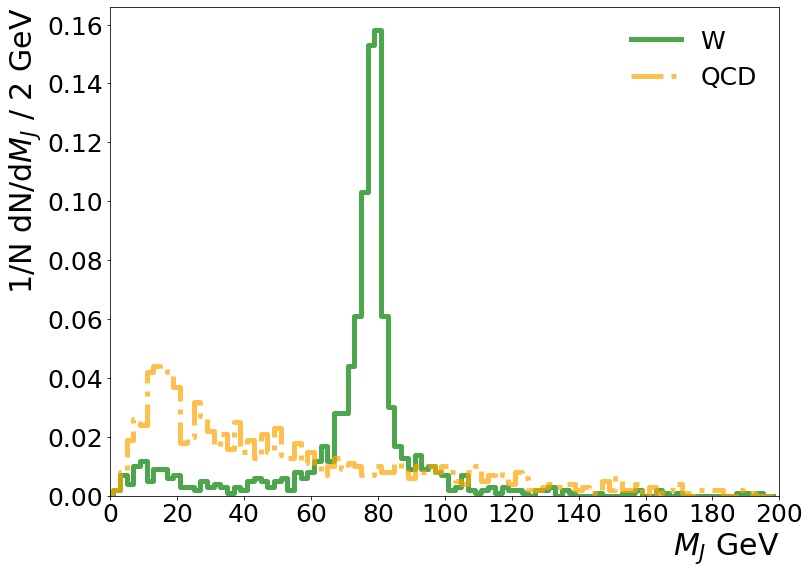

In [113]:
M_j = [MJ_W,MJ_QCD]

fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(M_j):
    length = np.linspace(0,200,101)
    HIST(process, length, title,colors[i],linestyle[i])
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlim((0,200))
    plt.xlabel("$M_{J}$ GeV", fontsize=30,horizontalalignment='right',x=1) 
    ax.xaxis.set_major_locator(MaxNLocator(10))
    
plt.ylim((0.))
plt.ylabel("1/N dN/d$M_{J}$ / 2 GeV", fontsize=30, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show()    
    

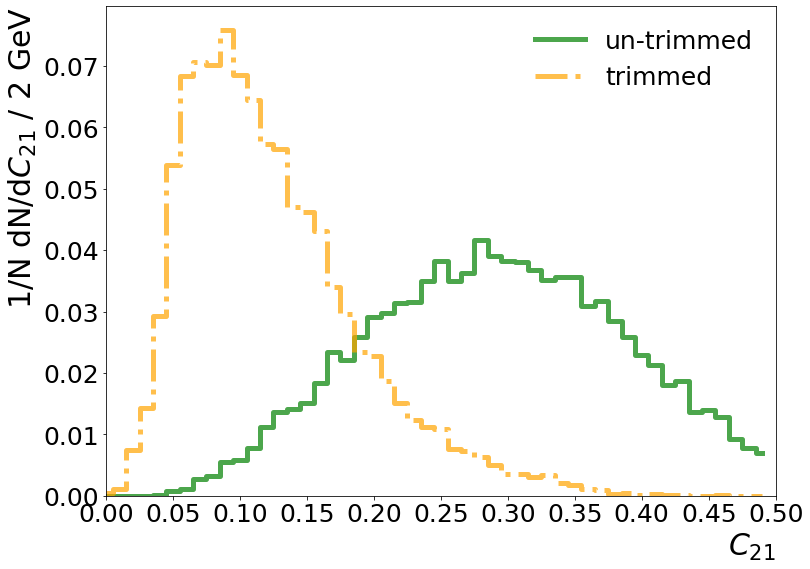

In [107]:
C_21 = [C21,C21_trimmed]

fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(C_21):
    length = np.linspace(0,0.5,51)
    HIST(process, length, title,colors[i],linestyle[i])
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlim((0,0.5))
    plt.xlabel("$C_{21}$", fontsize=30,horizontalalignment='right',x=1) 
    ax.xaxis.set_major_locator(MaxNLocator(10))
    
plt.ylim((0.))
plt.ylabel("1/N dN/d$C_{21}$ / 2 GeV", fontsize=30, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show()    

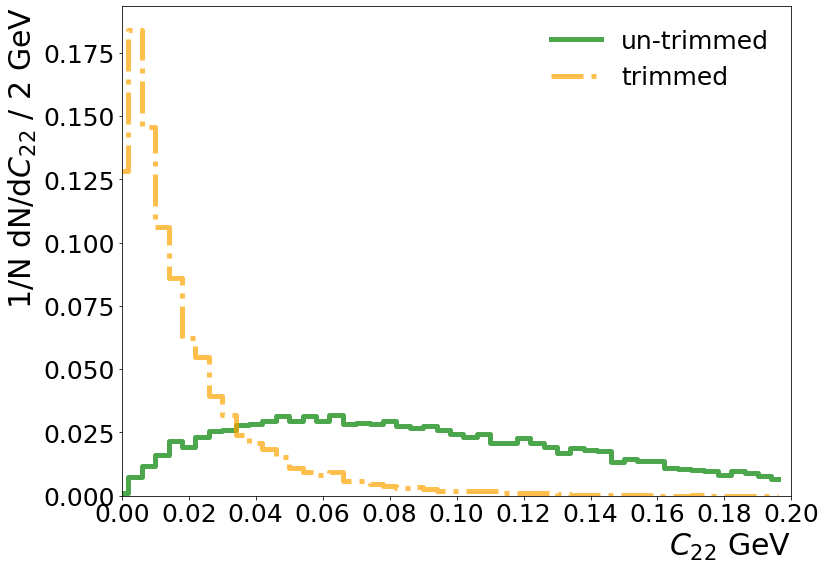

In [57]:
C_22 = [C22,C22_trimmed]

fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(C_22):
    length = np.linspace(0,0.2,51)
    HIST(process, length, title,colors[i],linestyle[i])
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlim((0,0.2))
    plt.xlabel("$C_{22}$ GeV", fontsize=30,horizontalalignment='right',x=1) 
    ax.xaxis.set_major_locator(MaxNLocator(10))
    
plt.ylim((0.))
plt.ylabel("1/N dN/d$C_{22}$ / 2 GeV", fontsize=30, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show()    

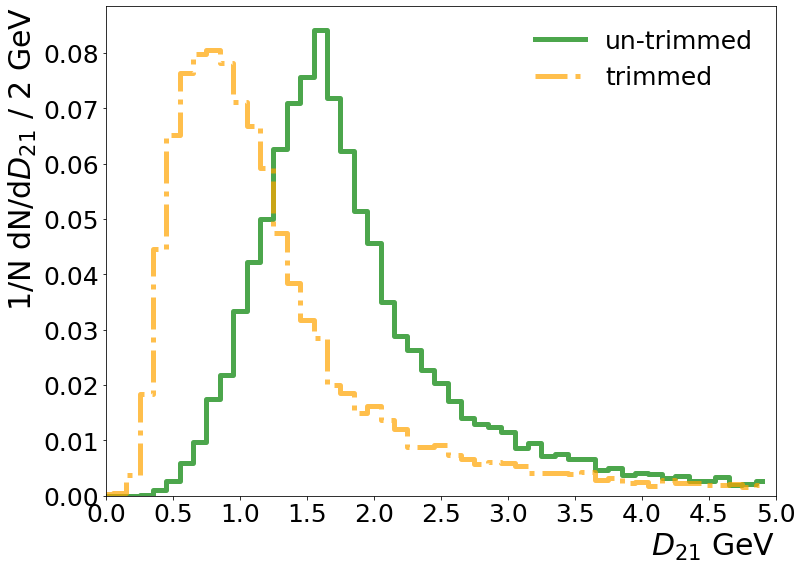

In [58]:
D_21 = [D21,D21_trimmed]

fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(D_21):
    length = np.linspace(0,5,51)
    HIST(process, length, title,colors[i],linestyle[i])
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlim((0,5))
    plt.xlabel("$D_{21}$ GeV", fontsize=30,horizontalalignment='right',x=1) 
    ax.xaxis.set_major_locator(MaxNLocator(10))
    
plt.ylim((0.))
plt.ylabel("1/N dN/d$D_{21}$ / 2 GeV", fontsize=30, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show()   

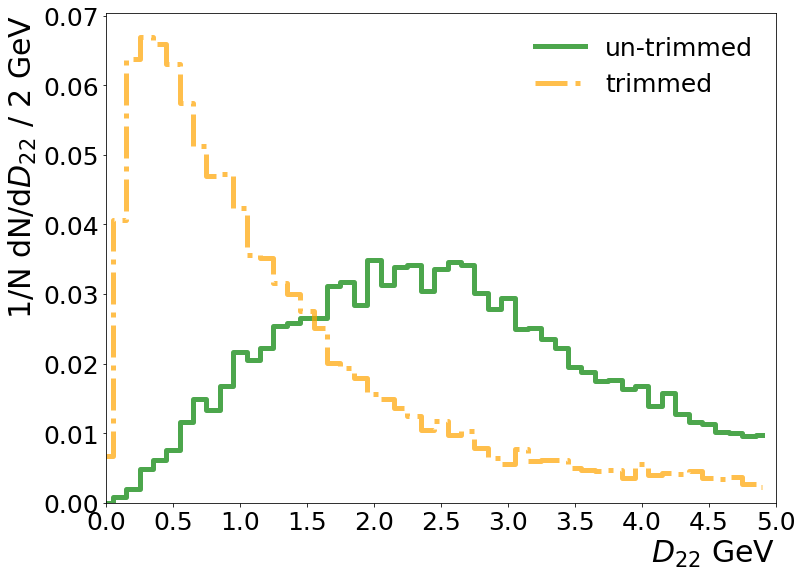

In [59]:
D_22 = [D22,D22_trimmed]

fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(D_22):
    length = np.linspace(0,5,51)
    HIST(process, length, title,colors[i],linestyle[i])
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlim((0,5))
    plt.xlabel("$D_{22}$ GeV", fontsize=30,horizontalalignment='right',x=1) 
    ax.xaxis.set_major_locator(MaxNLocator(10))
    
plt.ylim((0.))
plt.ylabel("1/N dN/d$D_{22}$ / 2 GeV", fontsize=30, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show()    

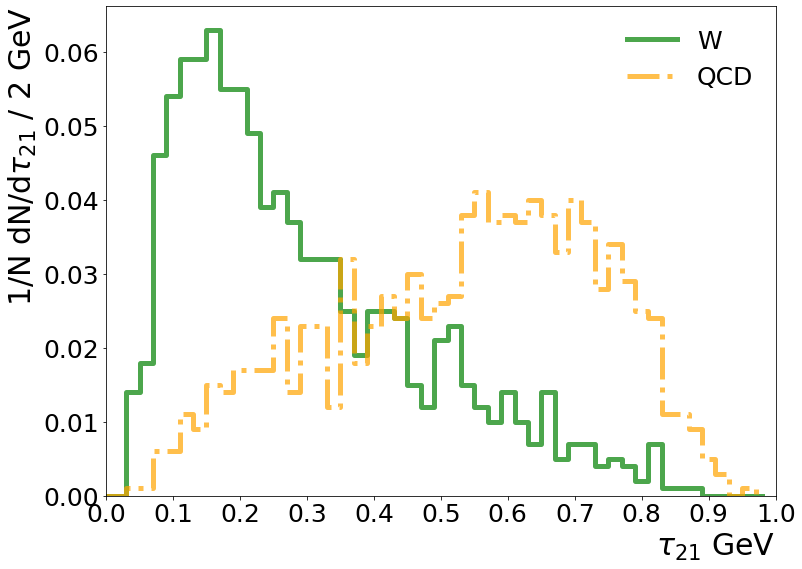

In [114]:
tau_21 = [t12_W,t12_QCD]

fig, ax = plt.subplots(1,1, figsize=(12,9))
for i, process in enumerate(tau_21):
    length = np.linspace(0,1,51)
    HIST(process, length, title,colors[i],linestyle[i])
    ax.tick_params(axis='x', labelsize=25)
    ax.tick_params(axis='y', labelsize=25)
    plt.xlim((0,1))
    plt.xlabel("$\\tau_{21}$ GeV", fontsize=30,horizontalalignment='right',x=1) 
    ax.xaxis.set_major_locator(MaxNLocator(10))
    
plt.ylim((0.))
plt.ylabel("1/N dN/d$\\tau_{21}$ / 2 GeV", fontsize=30, horizontalalignment='right',y=1)
# plt.savefig("./Plots/m_ww_parton.png", transparent=True, bbox_inches='tight')  #save figure as png
plt.show()    